https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm/comments#1236924

In [1]:
import yfinance as yf  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
ticker= 'SPY'
# ticker= 'QQQ'
# ticker= 'NVDA'
# ticker= 'AMD'
# ticker= 'DOGE-USD'
# ticker= 'ETH-USD'
# ticker= 'BTC-USD'


df = yf.download(ticker,'2011-01-01')
# df = df[['Adj Close']]
df.tail()

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-06-28  390.230011  393.160004  380.529999  380.649994  380.649994   
2022-06-29  381.230011  382.269989  378.420013  380.339996  380.339996   
2022-06-30  376.239990  380.660004  372.559998  377.250000  377.250000   
2022-07-01  376.559998  381.700012  373.799988  381.239990  381.239990   
2022-07-05  375.880005  376.309998  372.910004  373.309998  373.309998   

               Volume  
Date                   
2022-06-28   86548900  
2022-06-29   65676000  
2022-06-30  112508300  
2022-07-01   74792100  
2022-07-05   15299989

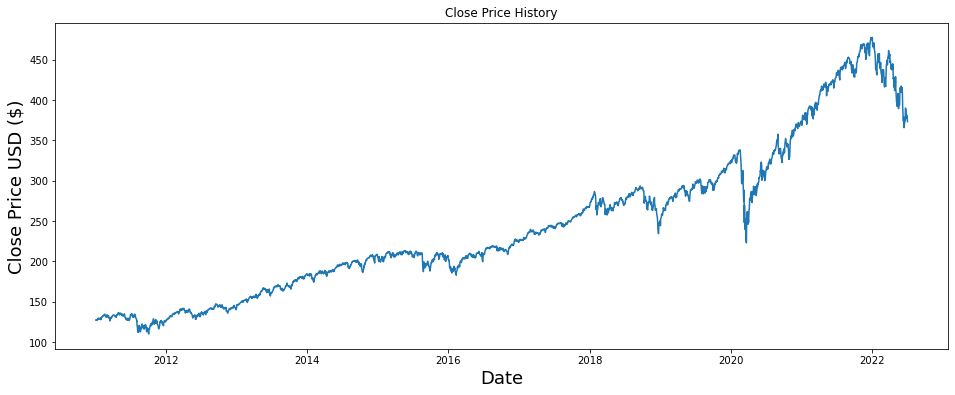

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2751

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04654958],
       [0.04635925],
       [0.04815379],
       ...,
       [0.72684759],
       [0.73769644],
       [0.71613466]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04654958, 0.04635925, 0.04815379, 0.04747403, 0.04679428,
       0.04635925, 0.0475828 , 0.05070967, 0.05013866, 0.05266736,
       0.05326555, 0.04981239, 0.04935016, 0.05013866, 0.05212357,
       0.05231388, 0.05367339, 0.05454349, 0.04837131, 0.05098155,
       0.05658276, 0.055903  , 0.0566915 , 0.05769752, 0.05992713,
       0.06155856, 0.06074285, 0.06087881, 0.06302681, 0.06389688,
       0.06275489, 0.0650389 , 0.06612649, 0.06688781, 0.05954647,
       0.05734408, 0.05709933, 0.06090598, 0.06313555, 0.05709933,
       0.0578607 , 0.06400566, 0.06128664, 0.05845884, 0.06158574,
       0.06106912, 0.05440753, 0.05685463, 0.05470663, 0.05065528,
       0.04418402, 0.04872478, 0.04848008, 0.05386374, 0.05264015,
       0.05364621, 0.05701777, 0.0581054 , 0.05723529, 0.05962804])]
[0.06210235607400372]

[array([0.04654958, 0.04635925, 0.04815379, 0.04747403, 0.04679428,
       0.04635925, 0.0475828 , 0.05070967, 0.05013866, 0.05266736,
       0.05326555, 0.04981239, 0.04

In [16]:
data

Close
Date                  
2011-01-03  127.050003
2011-01-04  126.980003
2011-01-05  127.639999
2011-01-06  127.389999
2011-01-07  127.139999
...                ...
2022-06-28  380.649994
2022-06-29  380.339996
2022-06-30  377.250000
2022-07-01  381.239990
2022-07-05  373.309998

[2895 rows x 1 columns]

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2022-07-05 10:09:04.939993: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-05 10:09:04.940105: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


2022-07-05 10:09:05.164376: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-05 10:09:05.785924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-05 10:09:05.958019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-05 10:09:06.033728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-05 10:09:06.128134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


   3/2691 [..............................] - ETA: 1:20 - loss: 0.1095 

2022-07-05 10:09:06.277662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2691/2691 [==============================] - 82s 30ms/step - loss: 0.0093


In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2022-07-05 10:10:26.902742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-05 10:10:26.975317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-07-05 10:10:27.052444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24.536871292414386

/var/folders/wm/gbt94vbn5kgbm6886gfnllvw0000gn/T/ipykernel_33086/2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


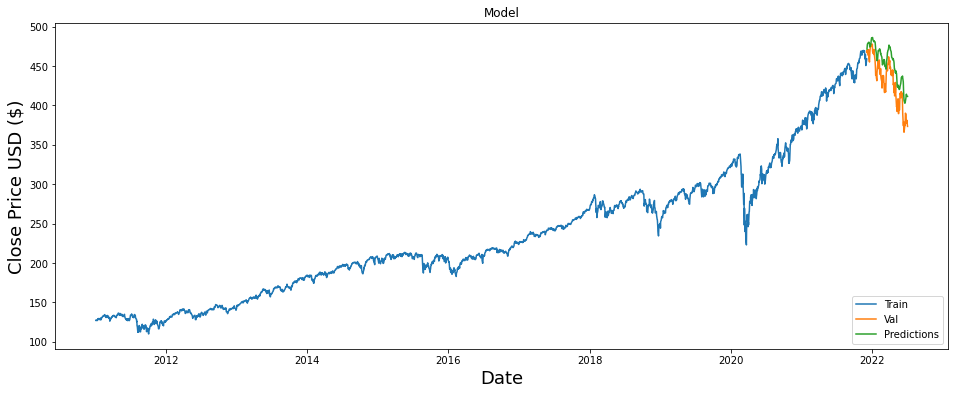

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<AxesSubplot:xlabel='Date'>

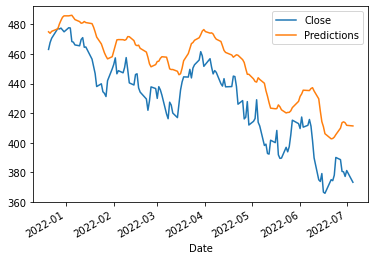

In [10]:
valid[10:].plot()

In [12]:
valid

Close  Predictions
Date                               
2021-12-07  468.279999   471.481598
2021-12-08  469.519989   474.391449
2021-12-09  466.350006   477.205200
2021-12-10  470.739990   478.074280
2021-12-13  466.570007   479.199402
...                ...          ...
2022-06-28  380.649994   413.578339
2022-06-29  380.339996   414.150177
2022-06-30  377.250000   413.506744
2022-07-01  381.239990   411.788391
2022-07-05  373.309998   411.369720

[144 rows x 2 columns]

In [13]:
x_test

array([[[0.91535699],
        [0.90880423],
        [0.91889176],
        ...,
        [0.94477677],
        [0.93395514],
        [0.94855625]],

       [[0.90880423],
        [0.91889176],
        [0.91696128],
        ...,
        [0.93395514],
        [0.94855625],
        [0.97435969]],

       [[0.91889176],
        [0.91696128],
        [0.9012725 ],
        ...,
        [0.94855625],
        [0.97435969],
        [0.97773125]],

       ...,

       [[0.94314535],
        [0.92745665],
        [0.91519386],
        ...,
        [0.75768123],
        [0.73609223],
        [0.73524934]],

       [[0.92745665],
        [0.91519386],
        [0.92131165],
        ...,
        [0.73609223],
        [0.73524934],
        [0.72684759]],

       [[0.91519386],
        [0.92131165],
        [0.91804887],
        ...,
        [0.73524934],
        [0.72684759],
        [0.73769644]]])

In [15]:
y_test

array([[468.27999878],
       [469.51998901],
       [466.3500061 ],
       [470.73999023],
       [466.57000732],
       [463.35998535],
       [470.6000061 ],
       [466.45001221],
       [459.86999512],
       [454.98001099],
       [463.05999756],
       [467.69000244],
       [470.6000061 ],
       [477.26000977],
       [476.86999512],
       [477.48001099],
       [476.16000366],
       [474.95999146],
       [477.70999146],
       [477.54998779],
       [468.38000488],
       [467.94000244],
       [466.08999634],
       [465.51000977],
       [469.75      ],
       [471.01998901],
       [464.52999878],
       [464.72000122],
       [456.48999023],
       [451.75      ],
       [446.75      ],
       [437.98001099],
       [439.83999634],
       [434.47000122],
       [433.38000488],
       [431.23999023],
       [441.95001221],
       [449.91000366],
       [452.95001221],
       [457.3500061 ],
       [446.6000061 ],
       [448.70001221],
       [447.26000977],
       [450